In [56]:
import os
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import time
from astropy.io import fits

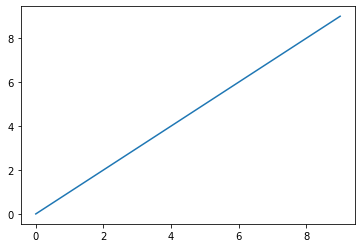

In [53]:
plt.figure()
plt.plot(np.arange(10))
plt.show()

In [30]:
os.chdir('/home/rfinn/research/Virgo-dev/getobjectsize-test/')

In [31]:
!ls

background.fits		       pointing-13_ha4.coadd.fits
check.fits		       pointing-13_R.coadd_cat.fits
cutouts			       pointing-13_R.coadd.fits
default.conv		       pointing-13_R.coadd-segmentation.fits
default.nnw		       segmentation.fits
default.param		       test.cat
default.se.objsize	       test_cat.fits
default.sex.HDI		       v17p013-data-rfinn-2021-Feb-13.fits
default.sex.HDI.mask	       v17p013_virgo_cat.fits
galaxies_in_filter.png	       v19p149
pointing-13_ha4.coadd-CS.fits


# selecting galaxies

there are two fairly big galaxies in this image.  getting their x and y coordinates using ds9.

In [32]:
xobj = np.array([2461,3519])
yobj = np.array([2013,2913])
pimage = 'pointing-13_R.coadd.fits'

# Test code

In [5]:
%run ~/github/halphagui/get_galaxy_size.py

In [6]:
osize,segm = getsegmentation(pimage)

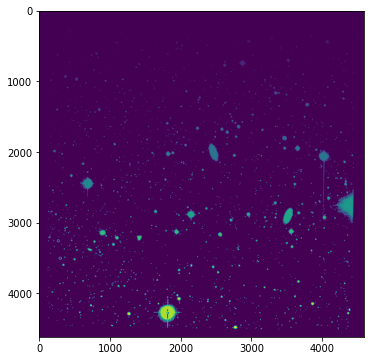

In [7]:
plt.figure(figsize=(6,6))
plt.imshow(osize.data)

In [8]:
%run ~/github/halphagui/get_galaxy_size.py

<Figure size 432x288 with 0 Axes>

In [ ]:
segm,cat = getsegmentation(pimage)

In [33]:
ids = segm.data[yobj,xobj]

In [41]:
objids = ids

In [38]:
tbl = cat.to_table()

In [51]:
dy = tbl['bbox_ymax'][objids-1] - tbl['bbox_ymin'][objids-1]
dx = tbl['bbox_xmax'][objids-1] - tbl['bbox_xmin'][objids-1]    
print(dx,dy)

[157. 148.] pix [257. 239.] pix


In [49]:
tbl[tbl['id'] == objids[0]]

id,xcentroid,ycentroid,sky_centroid,sky_centroid_icrs,source_sum,source_sum_err,background_sum,background_mean,background_at_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,min_value,max_value,minval_xpos,minval_ypos,maxval_xpos,maxval_ypos,area,equivalent_radius,perimeter,semimajor_axis_sigma,semiminor_axis_sigma,orientation,eccentricity,ellipticity,elongation,covar_sigx2,covar_sigxy,covar_sigy2,cxx,cxy,cyy,gini
,pix,pix,,,,,,,,pix,pix,pix,pix,,,pix,pix,pix,pix,pix2,pix,pix,pix,pix,deg,,,,pix2,pix2,pix2,1 / pix2,1 / pix2,1 / pix2,
int64,float64,float64,object,object,float32,object,object,object,object,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4691,2462.1500291570105,2008.294863263546,None,None,9730.258,None,None,None,None,2381.0,2538.0,1883.0,2140.0,0.12041359,4.5614214,2408.0,1986.0,2461.0,2003.0,21026.0,81.80943507261483,3541.10905269635,49.27612693990338,21.605495859866227,70.35449861196916,0.8987518404077589,0.5615423288803512,2.280721870930875,688.4879577755092,621.0182023138657,2206.446179772659,0.0019466672907485262,-0.0010958035890351189,0.0006074279081731008,0.40333299978962917


In [50]:
tbl[4691]

id,xcentroid,ycentroid,sky_centroid,sky_centroid_icrs,source_sum,source_sum_err,background_sum,background_mean,background_at_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,min_value,max_value,minval_xpos,minval_ypos,maxval_xpos,maxval_ypos,area,equivalent_radius,perimeter,semimajor_axis_sigma,semiminor_axis_sigma,orientation,eccentricity,ellipticity,elongation,covar_sigx2,covar_sigxy,covar_sigy2,cxx,cxy,cyy,gini
,pix,pix,,,,,,,,pix,pix,pix,pix,,,pix,pix,pix,pix,pix2,pix,pix,pix,pix,deg,,,,pix2,pix2,pix2,1 / pix2,1 / pix2,1 / pix2,
int64,float64,float64,object,object,float32,object,object,object,object,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4692,2455.717938458509,1883.9246531102358,None,None,0.77783436,None,None,None,None,2454.0,2457.0,1883.0,1885.0,0.12653458,0.19640224,2454.0,1884.0,2456.0,1883.0,5.0,1.2615662610100802,4.82842712474619,1.0165311821387413,0.5994784107429357,-18.034914793244873,0.8076008508375597,0.4102705147896625,1.6956927287488979,0.9687364646654562,-0.19840436416083337,0.4239735445418066,1.1416954046546233,1.0685447417274396,2.608657979415171,0.11146802330593465


In [54]:
np.max(dx,dy,keepdims=True)

TypeError: only integer dimensionless scalar quantities can be converted to a Python index

In [61]:
max(dx[0].value,dy[0].value)

257.0

# Trying all steps at once

* this works, but it's slow
* photutils takes a long time
* could create segmentation map with source extractor instead

In [62]:
%run ~/github/halphagui/get_galaxy_size.py

In [71]:
start_time = time.perf_counter()
size = getobjectsize(pimage,xobj,yobj)
print('elapsed time = ',time.perf_counter()-start_time)

elapsed time =  55.059521357063204


In [74]:
size

array([385.5, 358.5])

In [81]:
!ls

'default.*'   default.param   default.sex.HDI   pointing-13_R.coadd.fits


# trying source extractor instead of photutils

In [5]:
%run ~/github/halphagui/get_galaxy_size.py
start_time = time.perf_counter()
sizese = getobjectsize(pimage,xobj,yobj,usese=True)
print('elapsed time = ',time.perf_counter()-start_time)

sex pointing-13_R.coadd.fits -c default.se.objsize -CHECKIMAGE_TYPE SEGMENTATION -CHECKIMAGE_NAME pointing-13_R.coadd-segmentation.fits -CATALOG_NAME pointing-13_R.coadd_cat.fits -CATALOG_TYPE FITS_LDAC
[ 574 1240]
[2360 3439] [2590 3590]
[230 151]
[1748 2771] [2141 3038]
[393 267]
elapsed time =  6.626862047240138


In [7]:
sizese

array([687.75, 467.25])

In [44]:
os.chdir('/home/rfinn/research/Virgo-dev/getobjectsize-test/')
%run ~/github/halphagui/get_galaxy_size.py
segm,tbl = getsegmentation_se(pimage)

<IPython.core.display.Javascript object>

sex pointing-13_R.coadd.fits -c default.se.objsize -CHECKIMAGE_TYPE SEGMENTATION -CHECKIMAGE_NAME pointing-13_R.coadd-segmentation.fits -CATALOG_NAME pointing-13_R.coadd_cat.fits -CATALOG_TYPE FITS_LDAC


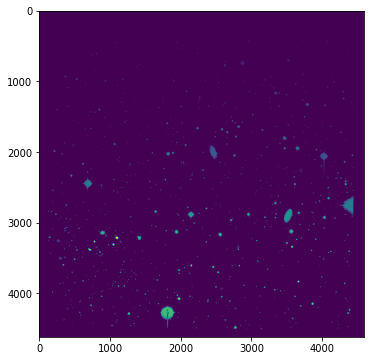

In [45]:
plt.figure(figsize=(6,6))
plt.imshow(segm)

In [58]:
objids = segm[yobj,xobj]

In [59]:
objids

array([198, 351], dtype=int32)

198


(2357.0, 2571.0, 1860.0, 2162.0)

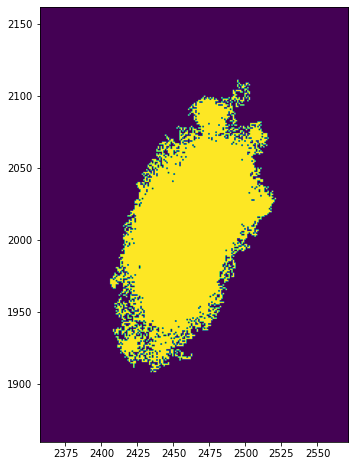

In [60]:
print(objids[0])
t = segm == objids[0]
plt.figure(figsize=(8,8))
plt.imshow(t)
dx=50
xmin = (tbl['XMIN_IMAGE'][objids-1][0]) - dx
xmax = (tbl['XMAX_IMAGE'][objids-1][0]) + dx
ymin = (tbl['YMIN_IMAGE'][objids-1][0]) - dx
ymax = (tbl['YMAX_IMAGE'][objids-1][0]) + dx
plt.axis([xmin,xmax,ymin,ymax])

In [49]:
print(tbl['XMIN_IMAGE'][objids-1][0])
print(tbl['XMAX_IMAGE'][objids-1][0])
print(tbl['YMIN_IMAGE'][objids-1][0])
print(tbl['YMAX_IMAGE'][objids-1][0])

2372
2523
1910
2121


In [32]:
print(tbl['XMIN_IMAGE'][objids-1][1])
print(tbl['XMAX_IMAGE'][objids-1][1])
print(tbl['YMIN_IMAGE'][objids-1][1])
print(tbl['YMAX_IMAGE'][objids-1][1])

3439
3631
2558
3030


351


(3408.0, 3635.0, 2756.0, 3056.0)

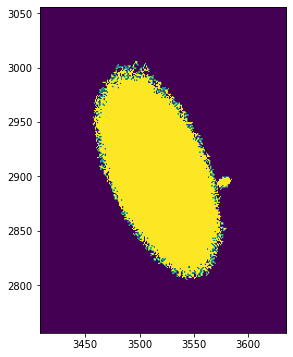

In [61]:
print(objids[1])
t = segm == objids[1]
plt.figure(figsize=(6,6))
plt.imshow(t)
dx=50
xmin = (tbl['XMIN_IMAGE'][objids-1][1]) - dx
xmax = (tbl['XMAX_IMAGE'][objids-1][1]) + dx
ymin = (tbl['YMIN_IMAGE'][objids-1][1]) - dx
ymax = (tbl['YMAX_IMAGE'][objids-1][1]) + dx
plt.axis([xmin,xmax,ymin,ymax])
#plt.axis([3200,3800,2600,3200])

In [206]:
print(tbl['XMAX_IMAGE'][objids-1] - tbl['XMIN_IMAGE'][objids-1])
print(tbl['YMAX_IMAGE'][objids-1] - tbl['YMIN_IMAGE'][objids-1])

[252 296]
[376 337]


In [207]:
print(tbl['A_IMAGE'][objids-1])
print(tbl['B_IMAGE'][objids-1])
print(tbl['THETA_IMAGE'][objids-1])

[47.87003  37.725674]
[21.375994 17.545294]
[ 69.37998 -67.68456]


In [210]:
print(8*tbl['A_IMAGE'][objids-1])


[382.96024 301.8054 ]


In [199]:
print(tbl['PETRO_RADIUS'][objids-1])


[5.9399996 5.2799997]


In [178]:
for o in objids:
    o -= 1
    print(tbl['XMIN_IMAGE'][o],tbl['X_IMAGE'][o],tbl['XMAX_IMAGE'][o])
    print(tbl['YMIN_IMAGE'][o],tbl['Y_IMAGE'][o],tbl['YMAX_IMAGE'][o])
    print()

2338 2462.9978 2590
1757 2009.2377 2133

3443 3516.959 3795
2686 2906.682 3023



# Made adjustments 

In [28]:
os.chdir('/home/rfinn/research/Virgo-dev/getobjectsize-test/')
%run ~/github/halphagui/get_galaxy_size.py
start_time = time.perf_counter()
sizese = getobjectsize(pimage,xobj,yobj,usese=True)
print('elapsed time = ',time.perf_counter()-start_time)
print(sizese)

NameError: name 'pimage' is not defined

<Figure size 432x288 with 0 Axes>

In [173]:
objids[0]

450

# Issue with SE segmentation mask

getting a few far-flung points that are associated with my object.  no idea why.  for this case, it doesn't affect the size of the image too much, but I would like to understand why.

* made adjustments in the default.se file, with min detect area, deblend, etc
* works ok now, but who knows if it will fail on others

452


<IPython.core.display.Javascript object>


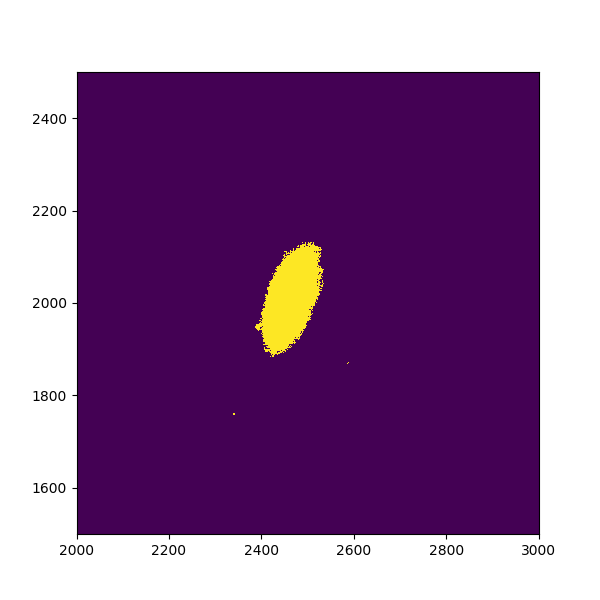

[2000, 3000, 1500, 2500]

In [181]:
print(objids[0])
t = segm == objids[0]
plt.figure(figsize=(6,6))
plt.imshow(t)
plt.axis([2000,3000,1500,2500])

# Comparing SE and photutils

In [33]:
os.chdir('/home/rfinn/research/Virgo-dev/getobjectsize-test/')
%run ~/github/halphagui/get_galaxy_size.py
start_time = time.perf_counter()
sizese = getobjectsize(pimage,xobj,yobj,usese=True)
print('elapsed time = ',time.perf_counter()-start_time)
print(sizese)

sex pointing-13_R.coadd.fits -c default.se.objsize -CHECKIMAGE_TYPE SEGMENTATION -CHECKIMAGE_NAME pointing-13_R.coadd-segmentation.fits -CATALOG_NAME pointing-13_R.coadd_cat.fits -CATALOG_TYPE FITS_LDAC
[200 353]
[2407 3458] [2521 3585]
[114 127]
[1910 2806] [2112 3006]
[202 200]
elapsed time =  2.104418361000171
[353.5 350. ]


In [218]:
os.chdir('/home/rfinn/research/Virgo-dev/getobjectsize-test/')
%run ~/github/halphagui/get_galaxy_size.py
start_time = time.perf_counter()
size = getobjectsize(pimage,xobj,yobj,usese=False,scale=1.75)
print('elapsed time = ',time.perf_counter()-start_time)
print(size)

[ 731 1123]
[2381. 3441.] pix [2538. 3589.] pix
[157. 148.] pix
[1883. 2790.] pix [2140. 3029.] pix
[257. 239.] pix
elapsed time =  15.578698560129851
[449.75 418.25]


In [221]:
540./60

9.0

# JM's size measurements

Now that the photometry catalog is done, I could use John's SMA estimates.

In [7]:
%run ~/github/Virgo/programs/readtablesv2.py

In [8]:
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0, 0.5, 'JM SMA_SB24*2*.262')

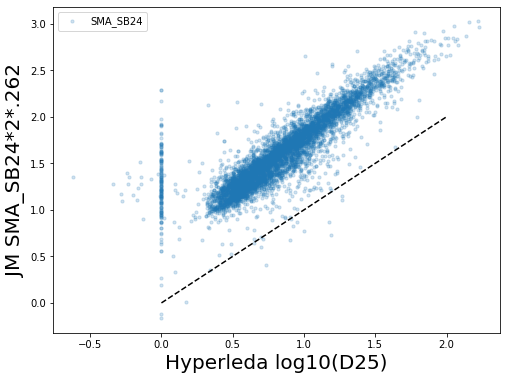

In [13]:
# plot D25 vs SMA from ephot catalogs
x = v.hl['logd25']
ecols = ['SMA_SB24']#,'SMA_SB25']

plt.figure(figsize=(8,6))
for i,e in enumerate(ecols):
    plt.scatter(x,np.log10(v.ephot[e]*2),s=10,c=mycolors[i],alpha=.2,label=e)
xline = np.linspace(0,2,100)
plt.plot(xline,xline,'k--')
plt.legend()
plt.xlabel("Hyperleda log10(D25)",fontsize=20)
plt.ylabel("JM SMA_SB24*2*.262",fontsize=20)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0, 0.5, 'JM SMA_SB24')

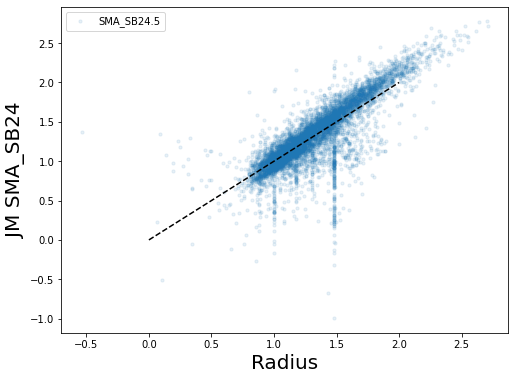

In [24]:
# plot D25 vs SMA from ephot catalogs
x = v.main['radius']
ecols = ['SMA_SB24.5']#,'SMA_SB25']

plt.figure(figsize=(8,6))
for i,e in enumerate(ecols):
    plt.scatter(np.log10(x),np.log10((v.ephot[e])),s=10,c=mycolors[i],alpha=.1,label=e)
xline = np.linspace(0,2,100)
plt.plot(xline,xline,'k--')
plt.legend()
plt.xlabel("Radius",fontsize=20)
plt.ylabel("JM SMA_SB24",fontsize=20)

# Summary

* can use JM's SMA_SB24 - this appears to be in arcsec, like the "radius"

* so I can use a multiple of SMA_SB24
* for those with no value of SMA_SB24, use the radius from the v.main table
  * we can iterate over these, and fix bad values
* need to figure out the multiple of SMA_SB24 to use

* ISSUE: seems like the segmentation image comes back with a different pixel scale, but this is a mystery for another day...

In [27]:
import sys
sys.path

['/home/rfinn/github/halphagui/notebooks',
 '/home/rfinn/anaconda3/lib/python37.zip',
 '/home/rfinn/anaconda3/lib/python3.7',
 '/home/rfinn/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/rfinn/anaconda3/lib/python3.7/site-packages',
 '/home/rfinn/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/rfinn/.ipython']

In [70]:
imdata = fits.getdata(pimage)

In [60]:
%run ~/github/Virgo/programs/display_image.py

<Figure size 432x288 with 0 Axes>

['VFID2137', 'VFID2134', 'VFID2135', 'VFID2144', 'VFID2153', 'VFID2156']
774 1024 3019 3269
774 1024 3019 3269
1324 1522 3118 3316
1324 1522 3118 3316
2476 2640 3088 3252
2476 2640 3088 3252
3019 4019 2413 3413
3019 4019 2413 3413
2036 2886 1588 2438
2036 2886 1588 2438
3373 3561 1713 1901
3373 3561 1713 1901


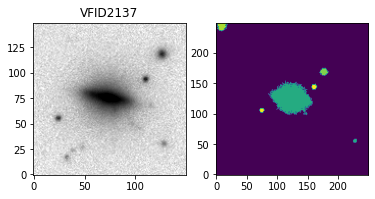

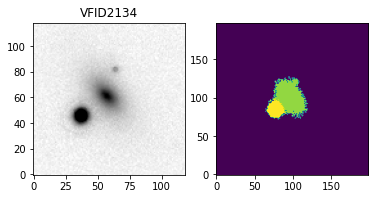

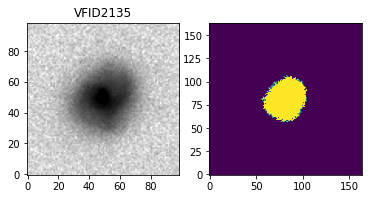

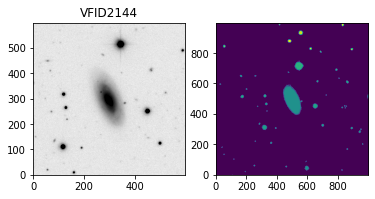

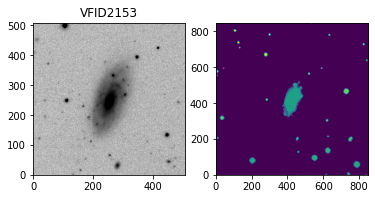

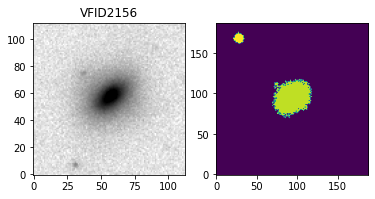

In [79]:
vfids = ['VFID2153','VFID2144']
pos_fromimage = [(899,3144),(1423,3217),(2558,3170),(xobj[1],yobj[1]),(xobj[0],yobj[0]),(3467,1807)]
vfids = [f'VFID{i}' for i in ['2137','2134','2135','2144','2153','2156']]
print(vfids)
#vfids = ['VFID2153','VFID2144']

i = 0
for x,y in pos_fromimage:
#for x,y in zip(xobj,yobj):
    plt.figure()
    # get size from v.main
    sizearc = v.ephot['SMA_SB24'][v.main['VFID'] == vfids[i]][0]
    # pixel scale for HDI is 0.45?
    pixscale = 0.45
    scale = 3
    sizepix = int(scale*sizearc/pixscale)
    xmin = x-sizepix
    xmax = x+sizepix
    ymin = y-sizepix
    ymax = y+sizepix
    plt.subplot(1,2,2)
    print(xmin,xmax,ymin,ymax)
    plt.imshow(segm[ymin:ymax,xmin:xmax],origin='lower')
    plt.subplot(1,2,1)
    print(xmin,xmax,ymin,ymax)
    display_image(imdata[ymin:ymax,xmin:xmax])
    plt.title(vfids[i])
    i += 1
plt.show()

In [40]:
v.main['VFID'][v.main['VFID'] == vfids[0]][0]

'VFID2153'

In [41]:
v.ephot['SMA_SB24'][v.main['VFID'] == vfids[0]][0]

63.76521

In [80]:
np.sum(v.ephot['SMA_SB24'] == 0)

242

In [83]:
226*7.2/60


27.12

In [84]:
718*.2/60

2.393333333333333

In [85]:
a = ['a','b']

In [86]:
a.append(['c','d'])

In [87]:
a

['a', 'b', ['c', 'd']]

In [88]:
testdict = {}

In [89]:
testdict.append('rose':53)

SyntaxError: invalid syntax (<ipython-input-89-2a07edc0e305>, line 1)

In [90]:
imnames = ['r','ha','cs','legacy_g','legacy_r','legacy_z',\
                   'w1','w2','w3','w4',\
                   'mask','nuv']

In [91]:
fitsimages = {i:None for i in imnames}

In [92]:
fitsimages

{'r': None,
 'ha': None,
 'cs': None,
 'legacy_g': None,
 'legacy_r': None,
 'legacy_z': None,
 'w1': None,
 'w2': None,
 'w3': None,
 'w4': None,
 'mask': None,
 'nuv': None}

In [93]:
fitsimages[0]='test'

In [94]:
fitsimages

{'r': None,
 'ha': None,
 'cs': None,
 'legacy_g': None,
 'legacy_r': None,
 'legacy_z': None,
 'w1': None,
 'w2': None,
 'w3': None,
 'w4': None,
 'mask': None,
 'nuv': None,
 0: 'test'}

In [95]:
for f in fitsimages: print(f)

r
ha
cs
legacy_g
legacy_r
legacy_z
w1
w2
w3
w4
mask
nuv
0


In [96]:
fitsimages[0]


'test'

# Testing method to get the pixel scale from an image header

In [97]:
imdata,imheader = fits.getdata(pimage,header=True)

In [108]:
from astropy.wcs import WCS
import astropy.units as u

In [100]:
image_wcs = WCS(imheader)

In [101]:
pscalex,pscaley = image_wcs.proj_plane_pixel_scales()

In [112]:
pscalex.to(u.arcsec).value

0.42543077724972

In [107]:
pscalex('arcsec/pixel')

TypeError: 'Quantity' object is not callable